In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_store = pd.read_csv('data/store.csv')

In [3]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [4]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df = df_train.merge(df_store, how='left', left_on=df_train.Store, right_on=df_store.Store)
df.drop(['key_0', 'Store_y'], axis=1, inplace=True)
df = df.rename(columns={'Store_x':'Store'})
df.shape

(1017209, 18)

In [7]:
cols = df.columns.tolist()
cols = [col.lower() for col in cols]
df.columns = cols

In [8]:
df.head()

,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday,storetype,assortment,competitiondistance,competitionopensincemonth,competitionopensinceyear,promo2,promo2sinceweek,promo2sinceyear,promointerval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
df = df.assign(
    timestamp = lambda x: pd.to_datetime(x['date']),
    year = lambda x: x['timestamp'].dt.year,
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    dayofyear = lambda x: x['timestamp'].dt.dayofyear
)

In [10]:
#df.drop(['date'], axis=1, inplace=True)

In [11]:
df['stateholiday'].replace({0:'0'}, inplace=True)

In [12]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
dayofweek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
schoolholiday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
competitiondistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
competitionopensincemonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
competitionopensinceyear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [13]:
df.isnull().sum()

store                             0
dayofweek                         0
date                              0
sales                             0
customers                         0
open                              0
promo                             0
stateholiday                      0
schoolholiday                     0
storetype                         0
assortment                        0
competitiondistance            2642
competitionopensincemonth    323348
competitionopensinceyear     323348
promo2                            0
promo2sinceweek              508031
promo2sinceyear              508031
promointerval                508031
timestamp                         0
year                              0
month                             0
day                               0
dayofyear                         0
dtype: int64

In [14]:
df.competitiondistance.min()

20.0

In [15]:
df.competitionopensincemonth.min()

1.0

In [16]:
df.competitionopensinceyear.min()

1900.0

In [17]:
df.promo2sinceweek.min()

1.0

In [18]:
df.promo2sinceyear.min()

2009.0

In [19]:
df['competitiondistance'].fillna(df['competitiondistance'].median(), inplace = True)

In [20]:
df.fillna(0, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   store                      1017209 non-null  int64         
 1   dayofweek                  1017209 non-null  int64         
 2   date                       1017209 non-null  object        
 3   sales                      1017209 non-null  int64         
 4   customers                  1017209 non-null  int64         
 5   open                       1017209 non-null  int64         
 6   promo                      1017209 non-null  int64         
 7   stateholiday               1017209 non-null  object        
 8   schoolholiday              1017209 non-null  int64         
 9   storetype                  1017209 non-null  object        
 10  assortment                 1017209 non-null  object        
 11  competitiondistance        1017209 no

In [22]:
df_test.fillna(1, inplace=True)

In [23]:
df.groupby('promointerval')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
promointerval,,,,,,,,
0,508031.0,6124.710161,4136.143923,0.0,3901.00,6038.0,8283.00,38722.0
"Feb,May,Aug,Nov",118596.0,5311.048585,3381.166345,0.0,3515.00,5402.0,7364.25,41551.0
"Jan,Apr,Jul,Oct",293122.0,5562.364063,3609.884075,0.0,3680.00,5610.0,7614.00,37646.0
"Mar,Jun,Sept,Dec",97460.0,5143.829243,3314.203545,0.0,3450.75,5172.0,7043.00,26516.0


In [24]:
df = pd.get_dummies(df, columns=['stateholiday', 'storetype', 'assortment', 'promointerval'], drop_first=True)

In [25]:
#df = df.set_index(pd.DatetimeIndex(df['timestamp']))

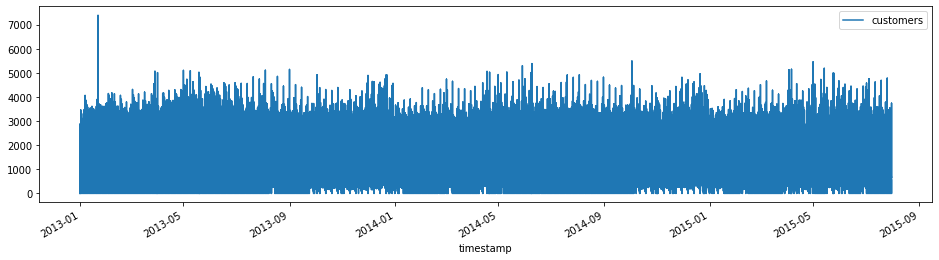

In [26]:
df.plot(x='timestamp', y='customers', figsize=(16, 4));

In [29]:
cols = df_test.columns.tolist()
cols = [col.lower() for col in cols]
df_test.columns = cols

In [30]:
df_test = df_test.assign(
    timestamp = lambda x: pd.to_datetime(x['date']),
    year = lambda x: x['timestamp'].dt.year,
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    dayofyear = lambda x: x['timestamp'].dt.dayofyear
)

In [31]:
#df_test.drop(['date'], axis=1, inplace=True)

In [32]:
df_test = df_test[(df_test["open"] != 0)]

In [33]:
#df_test = df_test.set_index(pd.DatetimeIndex(df_test['timestamp']))

In [34]:
df_test = pd.get_dummies(df_test, columns=['stateholiday', 'schoolholiday', 'store', 'promo'])

In [35]:
df_test.head()

,id,dayofweek,date,open,timestamp,year,month,day,dayofyear,stateholiday_0,...,store_1106,store_1107,store_1109,store_1111,store_1112,store_1113,store_1114,store_1115,promo_0,promo_1
0,1,4,2015-09-17,1.0,2015-09-17,2015,9,17,260,1,...,0,0,0,0,0,0,0,0,0,1
1,2,4,2015-09-17,1.0,2015-09-17,2015,9,17,260,1,...,0,0,0,0,0,0,0,0,0,1
2,3,4,2015-09-17,1.0,2015-09-17,2015,9,17,260,1,...,0,0,0,0,0,0,0,0,0,1
3,4,4,2015-09-17,1.0,2015-09-17,2015,9,17,260,1,...,0,0,0,0,0,0,0,0,0,1
4,5,4,2015-09-17,1.0,2015-09-17,2015,9,17,260,1,...,0,0,0,0,0,0,0,0,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   store                           1017209 non-null  int64         
 1   dayofweek                       1017209 non-null  int64         
 2   date                            1017209 non-null  object        
 3   sales                           1017209 non-null  int64         
 4   customers                       1017209 non-null  int64         
 5   open                            1017209 non-null  int64         
 6   promo                           1017209 non-null  int64         
 7   schoolholiday                   1017209 non-null  int64         
 8   competitiondistance             1017209 non-null  float64       
 9   competitionopensincemonth       1017209 non-null  float64       
 10  competitionopensinceyear        1017209 no

In [51]:
from scipy.ndimage import gaussian_filter
import statsmodels.formula.api as smf

In [61]:
daily_data_df = df \
    .groupby(['date', 'year', 'month', 'day', 'dayofyear'], as_index=False)\
    .agg({'sales': np.mean}) \
    .set_index('date')

In [62]:
smooth_daily_data_df = daily_data_df \
    .reset_index() \
    .assign(date = lambda x: x['date'].transform(pd.to_datetime))

In [63]:
smooth_daily_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       942 non-null    datetime64[ns]
 1   year       942 non-null    int64         
 2   month      942 non-null    int64         
 3   day        942 non-null    int64         
 4   dayofyear  942 non-null    int64         
 5   sales      942 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 44.3 KB


In [64]:
smooth_daily_data_df = smooth_daily_data_df \
    .assign(sales_smooth_gf_30 = lambda x: gaussian_filter(input=x['sales'], sigma=30)) \
    .assign(sales_smooth_gf_90 = lambda x: gaussian_filter(input=x['sales'], sigma=90))

In [67]:
smooth_daily_data_df = smooth_daily_data_df.assign(
    index = lambda x: np.linspace(start=0, stop=x.shape[0]-1, num=x.shape[0]),
    day_of_year_cs = lambda x: np.sin(2*np.pi*x['dayofyear']/365.5),
    day_of_year_cc = lambda x: np.cos(2*np.pi*x['dayofyear']/365.5)
)

In [66]:
decomp_model = smf.ols(formula = 'sales ~ index + day_of_year_cs + day_of_year_cc', data=smooth_daily_data_df)

# Train model
decomp_red = decomp_model.fit()
print(decomp_red.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.475
Date:                Sat, 24 Jul 2021   Prob (F-statistic):              0.220
Time:                        18:53:49   Log-Likelihood:                -8840.2
No. Observations:                 942   AIC:                         1.769e+04
Df Residuals:                     938   BIC:                         1.771e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5497.8909    187.936     29.

In [69]:
from pmdarima.arima import ADFTest
from statsmodels.tsa.stattools import adfuller,kpss

In [ ]:
def stationarity_test(sales):
    
    # Calculate rolling mean and rolling standard deviation
    rolling_mean = sales.rolling(30).mean()
    rolling_std_dev = sales.rolling(30).std()
    
    # Plot the statistics
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='#FF5A36', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='#1E4485', label = 'Rolling Std Dev')
    plt.plot(sales, color='#99D04A',label='Original Time Series')
    plt.xticks([])
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    # ADF test
    print("ADF Test:")
    adf_test = adfuller(sales,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('----'*10)
    
    # KPSS test
    print("KPSS Test:")
    kpss_test = kpss(sales, regression='c', nlags="legacy", store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('----'*10)
    
stationarity_test(df['sales'])

ADF Test:


In [ ]:
df['sales_detrend'] = (df['sales'] - df['sales'].shift(30))

In [79]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df)

TypeError: invalid type promotion

In [68]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [71]:
arima_model = auto_arima(df,
                      start_p=1, start_q=1,
                      max_p=5, max_q=5,
                      test='adf',        
                      trace=True,
                      alpha=0.05,
                      scoring='mse',
                      suppress_warnings=True,
                      seasonal = False
                      )

model_fit = arima_model.fit(df) 
print(fitted_model.summary())

forecast_values = fitted_model.predict(len(df_test), alpha=0.05) 
fcv_series = pd.Series(forecast_values[0], index=df_test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train, label='training')
plt.plot(df_test, label='Actual Stock Price')
plt.plot(fcv_series,label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.xticks([])
plt.legend(loc='upper left', fontsize=8)
plt.show()

rms_auto_arima = sqrt(mean_squared_error(df_test.values, fcv_series))
print("Auto-Arima RMSE :- " + str(round(rms_auto_arima,3)))

TypeError: invalid type promotion

In [69]:
#model = ARIMA(df_train['sales'], order=(5, 1, 0))
#model_fit = model.fit()

#print(model_fit.summary())

#residuals = pd.DataFrame(model_fit.resid)
#residuals.plot(kind='kde')
#print(residuals.describe())

#pyplot.show()